In [1]:
#Importing EDA related functions
import numpy as np
import os
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import datetime 

from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
#import matplotlib.pylab as plt #for visualization

#Importing Time series Related Functions

#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import accuracy_score
#from sklearn.ensemble import IsolationForest

#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import acf, pacf
#from statsmodels.tsa.seasonal import seasonal_decompose

#Taking datetime index as reading csv
def parser(x):  
    return datetime.strptime(x,'%m/%d/%y')  
dataset = pd.read_csv('27IndiaConfirmed.csv',header=0, delimiter=',',index_col=0, parse_dates=[0], date_parser=parser)  


In [2]:
dataset = pd.read_csv('IndiaConfirmed.csv',header=0, delimiter=',')
dataset["DailyCases"]=0
# print(dataset.head(),"\n")
# print(dataset.tail(5),"\n")
# print(dataset.info(),"\n")
# print(dataset.dtypes,"\n")


In [3]:
for i in range(2,len(dataset)):
    dataset.iloc[i,2]=dataset.iloc[i,1]-dataset.iloc[i-1,1]
#Here Date column is a string(i.e. object) we need to convert it to datetime object
dataset['Date']=pd.to_datetime(dataset['Date'])
# dataset.set_index('Date')# Used to set date column as index column.Didn't work first since inplace was false by default
dataset.set_index('Date',inplace=True)


In [4]:
# print(dataset.info())
print("\n",dataset.head(2))


             ConfirmedCases  DailyCases
Date                                  
2020-01-22               0           0
2020-01-23               0           0


 d3=d2.copy(deep=True)  
 d3 = d3.set_index(pd.DatetimeIndex(d3['Date']))  
 d3.set_index(['Date'])  
 df.set_index(['Datetime'])  

Converting string object to specific datetime format(output wala) 
 * df['Dates'] = pd.to_datetime(df['Dates'], format='%y%m%d')

dataset=dataset.drop(['Date'],axis=1)

plt.style.use('seaborn')
plt.figure(figsize=(12,5))
#dataset.plot()
plt.plot(dataset)
plt.show()

plt.style.use('seaborn')
plt.figure(figsize=(12,5))
plt.plot(dataset["DailyCases"])
plt.show()

## Splitting Daily Cases dataset into train and test 

In [5]:
from sklearn.model_selection import train_test_split as tts
daily=dataset.filter(['DailyCases'],axis=1)
daily = daily.asfreq(pd.infer_freq(daily.index))

train_size=0.8
test_size=0.2
daily_train,daily_test = tts(daily,test_size = test_size, random_state=0, shuffle=False)
 

In [6]:
print("\nDaily",daily.head(2))
print("\nTrain",daily_train.head(2))
print("\nTest",daily_test.head(2))
print("\nTrain Count : ",daily_train.count(),"\nTest Count : ",daily_test.count())
# daily_train.plot()
# daily_test.plot()


Daily             DailyCases
Date                  
2020-01-22           0
2020-01-23           0

Train             DailyCases
Date                  
2020-01-22           0
2020-01-23           0

Test             DailyCases
Date                  
2021-03-25       59118
2021-03-26       62258

Train Count :  DailyCases    428
dtype: int64 
Test Count :  DailyCases    107
dtype: int64


## Plotting Rolling Mean and Standard Deviation of Dataset - Visual Test for Checking  Stationarity of dataset

In [7]:
def check_mean_std(ts, name):

    rolmean = ts.rolling(window=30).mean()
    rolstd = ts.rolling(window=30).std()
    plt.figure(figsize=(12,8))   
    print(name)
    
    plt.style.use('seaborn')
    plt.figure(figsize=(12,8))
    plt.plot(ts, color='red',label='Original')
    plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.tight_layout()
    plt.xlabel("Date")
    plt.ylabel("Daily Cases")
    plt.title('COVID-19 Daily Cases Rolling Mean & Standard Deviation(India)')
    plt.legend()
    plt.show()



Daily Cases


<Figure size 864x576 with 0 Axes>

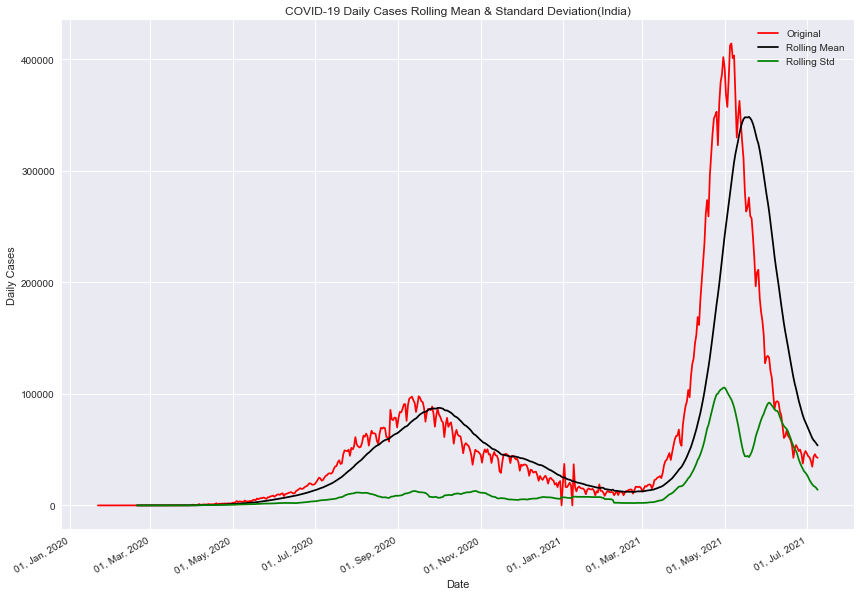

In [8]:
check_mean_std(dataset['DailyCases'],'\n\nDaily Cases')

#### The moving average is not constant but standard deviation seems to be constant.

## Performing ADF Test for checking stationarity of dataset

In [9]:
from statsmodels.tsa.stattools import adfuller
def check_adfuller(att):

    print('Results of Augmented Dickey Fuller Test:')
    print("\nInformation: For a stationary time series Test statistic is less than critical values.The p value[ranged between 0 to 1] <=0.05 for stationary time series\n")
    dftest = adfuller(att, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

In [10]:
check_adfuller(dataset['DailyCases'])

Results of Augmented Dickey Fuller Test:

Information: For a stationary time series Test statistic is less than critical values.The p value[ranged between 0 to 1] <=0.05 for stationary time series

Test Statistic                  -2.966587
p-value                          0.038135
#Lags Used                      19.000000
Number of Observations Used    515.000000
Critical Value (1%)             -3.443112
Critical Value (5%)             -2.867168
Critical Value (10%)            -2.569768
dtype: float64


###  The p-value is very less, and the Test Statistic is less than Critical Values - So according to ADF Test the time series is somewhat stationary

## Plotting AutoCorrelationFunction(ACF) and Partial AutoCorrelation Function(PACF) Graphs
RitMat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


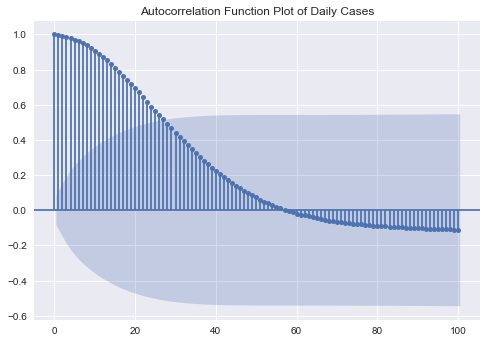

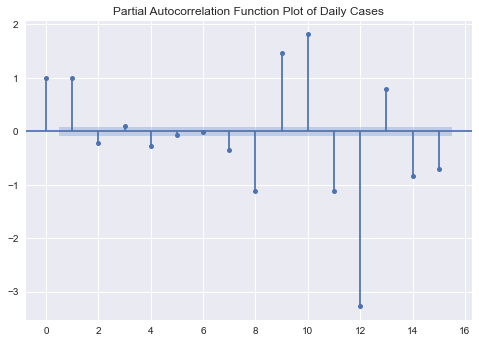

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(daily.DailyCases,title="Autocorrelation Function Plot of Daily Cases",lags=100)

pacf_plot = plot_pacf(daily.DailyCases,title="Partial Autocorrelation Function Plot of Daily Cases",lags=15)

### Initial:Based on PACF Graph it looks like the lags 1,2,7,8,9,11,13,19 are good places to start for Auto Regressive model.
### 2nd Iteration Based on PACF Graph it looks like the lags [9,11,13,25] are good places to start for Auto Regressive model.
### 3rd Iteration Based on PACF Graph it looks like the lags [8,9,10,11,12] are good places to start for Auto Regressive model.


### The auto correlation function(ACF) graph is decaying over time, which suggest an auto regressive process inherently. If it would have shut off immediately after some lags, it would have been close to a moving average model

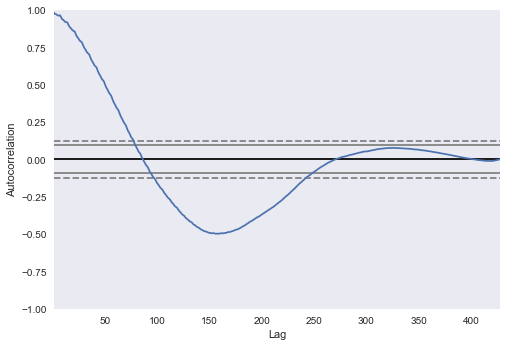

<Figure size 864x576 with 0 Axes>

In [12]:
from pandas.plotting import autocorrelation_plot  
x = autocorrelation_plot(daily_train)
   
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
# ploting the Curve
x.plot()
plt.show()

Lag Value for  
    daily : 50  
    train : 100  
    test : 30
    

In [13]:
from statsmodels.tsa.stattools import acf, pacf
def acf_pacf_plots(dataset):
#     ts_diff = dataset - dataset.shift()
#     ts_diff.dropna(inplace=True)
    acf_result = acf(dataset,nlags=60)
    pacf_result = pacf(dataset,nlags=10, method='ols')
    
    # ACF
    plt.figure(figsize=(22,10))
    plt.style.use('seaborn')
    plt.subplot(121) 
    plt.plot(acf_result)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelation")
    plt.title('Autocorrelation Function')
    
#     PACF
    plt.subplot(122)
    plt.style.use('seaborn')
    plt.plot(pacf_result)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.xlabel("Lags")
    plt.ylabel("Partial Autocorrelation")
    plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


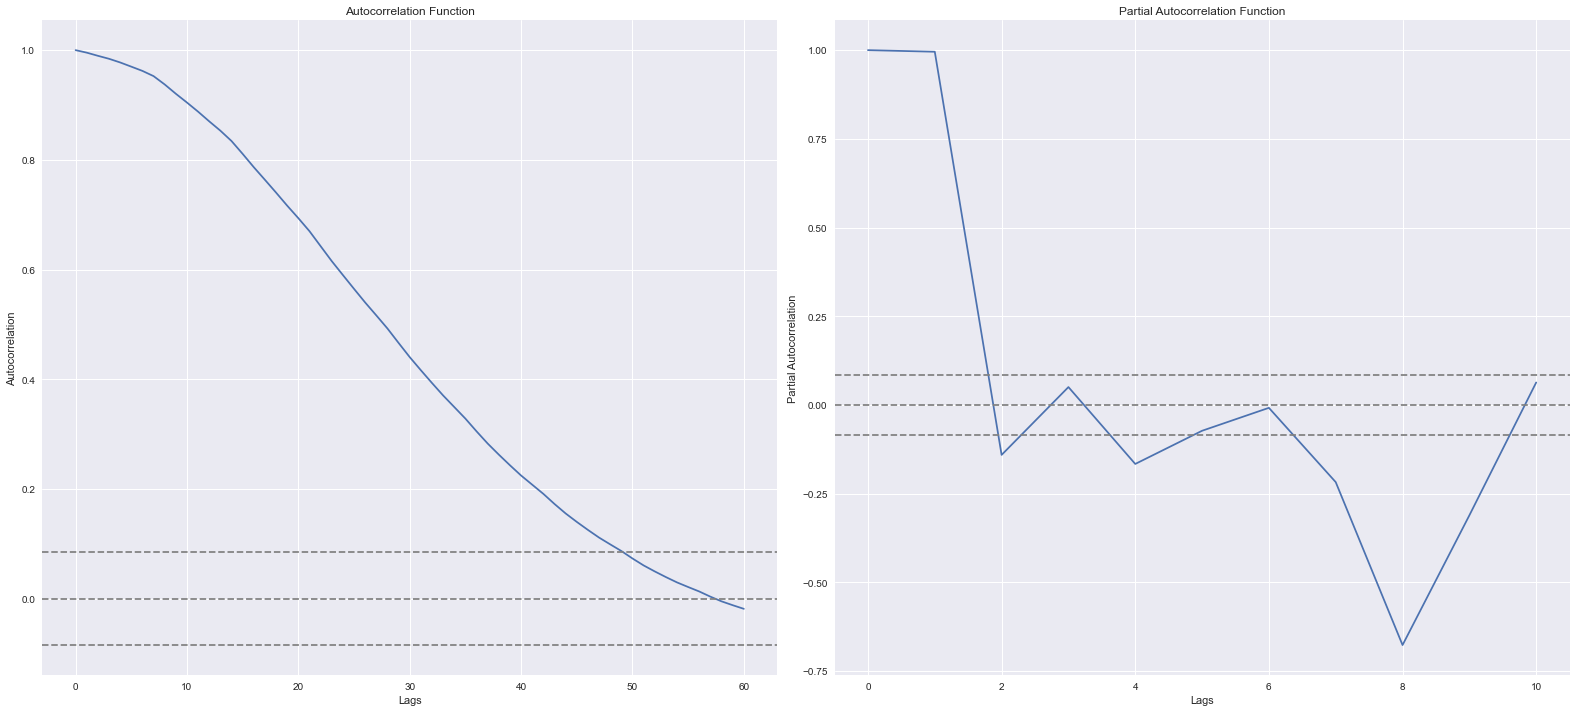

In [14]:
acf_pacf_plots(daily)

In [ ]:
# pip install --user pmdarima

# ------KEEP MOVING FORWARD!!-------